In [6]:
import snowmicropyn
from snowmicropyn import proksch2015
import glob
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [7]:
smpdir = '../data/SMP/all_raw/'

smpfilenames = os.listdir(smpdir)

aug21, oct5 = [], []

for f in sorted(smpfilenames):
    
    try:
        p = snowmicropyn.Profile(f'{smpdir}{f}')

        date = p.timestamp.date()

        if date == datetime.date(2023,8,21):
            aug21.append(f)
        elif date == datetime.date(2023,10,5):
            oct5.append(f)  
    except Exception as e:
        print(e)

Latitude value -100329.0 invalid, replacing by None
Longitude value -100329.0 invalid, replacing by None
Latitude value -100329.0 invalid, replacing by None
Longitude value -100329.0 invalid, replacing by None
Unable to build timestamp from pnt header fields
unpack_from requires a buffer of at least 2 bytes
Traceback (most recent call last):
  File "/home/robbie/anaconda3/lib/python3.7/site-packages/snowmicropyn/pnt.py", line 226, in load
    value = struct.unpack_from(fmt, raw, offset)
struct.error: unpack_from requires a buffer of at least 2 bytes
unpack_from requires a buffer of at least 10879142 bytes
Traceback (most recent call last):
  File "/home/robbie/anaconda3/lib/python3.7/site-packages/snowmicropyn/pnt.py", line 238, in load
    raw_samples = struct.unpack_from('>{}h'.format(count), raw, offset=512)
struct.error: unpack_from requires a buffer of at least 10879142 bytes
unpack_from requires a buffer of at least 1886262368 bytes
Traceback (most recent call last):
  File "/hom

'NoneType' object has no attribute 'date'
Failed to load pnt file. Message: unpack_from requires a buffer of at least 2 bytes
Failed to load pnt file. Message: unpack_from requires a buffer of at least 10879142 bytes
Failed to load pnt file. Message: unpack_from requires a buffer of at least 1886262368 bytes


In [8]:
tube_weight = 282
total_weights = np.array([342,375,318,344])

snow_densities = 1000*((total_weights-tube_weight)) / 250

snow_densities

array([240., 372., 144., 248.])

August Soft
12.125124775298627
August Hard
8.877163925302138
October Soft
20.98164704049747
October Hard
11.24984409280256


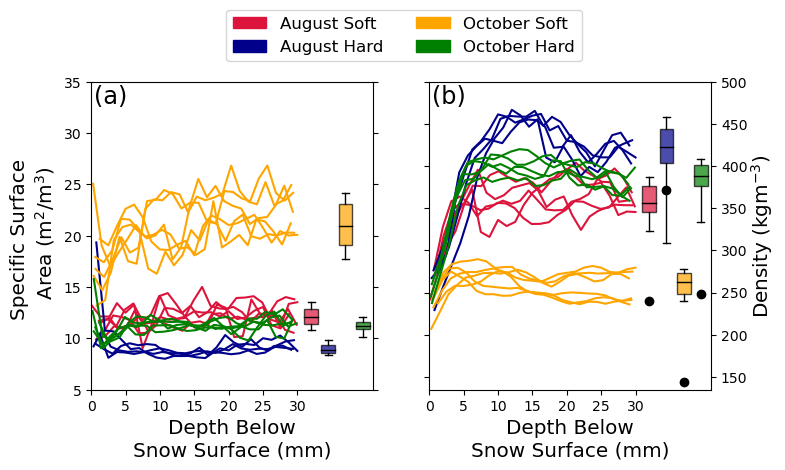

In [10]:
smpdir = '../data/SMP/all_raw/'

labels = ['August Soft', 'August Hard', 'October Soft', 'October Hard']

colors = ['crimson','darkblue','orange','green']

x = 4; y = 6

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

for datelist,counter,color,weight,label in zip([
    aug21[x:],                       
                           aug21[:x],
    
                           oct5[:y],
                           oct5[y:],
                          ],
                                  [0,2.5,5,7.5],
                          colors,snow_densities,labels):
    
    ssa_measurements = []
    den_measurements = []
    print(label)
    for f in datelist:

        p = snowmicropyn.Profile(f'{smpdir}{f}')

        surf_dist = p.detect_surface()
        if f == 'S54M0036.PNT': surf_dist = 183
        if f == 'S54M0037.PNT': surf_dist = 180

        p15 = proksch2015.calc(p.samples)
        
        p15 = p15[p15['distance']-surf_dist <= 30]
        p15 = p15[p15['distance']-surf_dist > 0]
        
        ax1.plot(p15['distance']-surf_dist,p15['P2015_ssa'],color=color)
        ax2.plot(p15['distance']-surf_dist,p15['P2015_density'],color=color)
        
        m = np.nanmean(p15['P2015_ssa'])
        s = np.nanstd(p15['P2015_ssa'])
        
        ssa_measurements += list(p15['P2015_ssa'])
        den_measurements += list(p15['P2015_density'])
        
    bp1 = ax1.boxplot(ssa_measurements,positions=[32+counter],showfliers=False,widths=2,whis=[10,90],
                      patch_artist=True,boxprops={'facecolor':color,'alpha':0.7})

    print(np.median(ssa_measurements))
    
    bp2 = ax2.boxplot(den_measurements,positions=[32+counter],showfliers=False,widths=2,whis=[10,90],
                        patch_artist=True,boxprops={'facecolor':color,'alpha':0.7})
    
    ax2.fill_between([],[],color=color,label=label)
    
    ax2.scatter([32+counter],[weight],color='k',zorder=10)
    
    bp1['medians'][0].set_color('k'); bp2['medians'][0].set_color('k')

ax1.set_ylim(5,35)

for ax in (ax1,ax2):
    ax.set_xlim(0,41)
    ax.set_xticks(np.arange(0,31,5))
    ax.set_xticklabels(np.arange(0,31,5))
    ax.set_xlabel('Depth Below\nSnow Surface (mm)',fontsize='x-large')
    ax.tick_params(axis="y", which="both",right=True,left=True)

    
ax2.yaxis.tick_right()
ax2.tick_params(axis="y", which="both",right=True,left=True)
ax2.yaxis.label_position = 'right'
ax2.set_ylabel('Density (kgm$^{-3}$)',labelpad=20,fontsize='x-large')
ax2.set_ylim(135,500)
ax1.set_ylabel('Specific Surface \n Area (m$^2$/m$^3$)',labelpad=5,fontsize='x-large')

ax2.legend(ncol=2,bbox_to_anchor=(-0.09,1.15),loc='center',fontsize='large')

# fig.subplots_adjust(hspace=0.02)

ax1.annotate('(a)',xy=(0.01,0.99),va='top',xycoords='axes fraction',fontsize='xx-large')
ax2.annotate('(b)',xy=(0.01,0.99),va='top',xycoords='axes fraction',fontsize='xx-large')

plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/rothera_dye_brine_v2/figs/SMP.png',dpi=500,bbox_inches='tight')

In [54]:
x = bp1['medians']
np.array

array([<matplotlib.lines.Line2D object at 0x7f8bb152c6a0>], dtype=object)

In [39]:
aug21[:x]

['S54M0033.PNT', 'S54M0034.PNT', 'S54M0036.PNT', 'S54M0037.PNT']

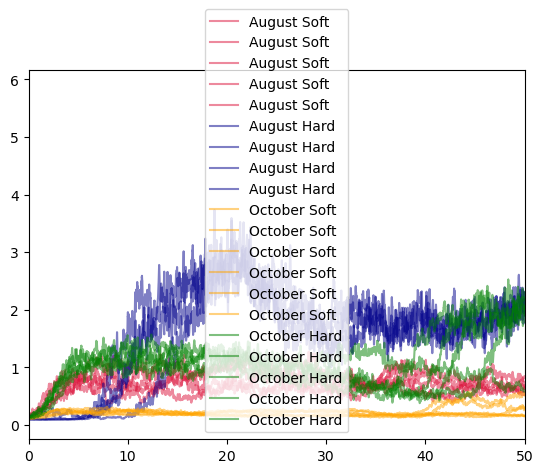

In [37]:
smpdir = '../data/SMP/all_raw/'


for datelist,color,label in zip([aug21[x:],                       
                           aug21[:x],
    
                           oct5[:y],
                           oct5[y:],],
                          ['crimson','darkblue','orange','green'],labels):
    
    for f in datelist:

        p = snowmicropyn.Profile(f'{smpdir}{f}')

        surf_dist = p.detect_surface()
        
        if label == 'August Hard': 
            surf_dist = 175

        p15 = p.samples
        
        con = 15
        plt.plot(p15['distance']-surf_dist,np.convolve(p15['force'],np.ones(con)/con,mode='same'),
                 color=color,alpha=0.5,label=label)

plt.xlim(0,50)
plt.legend()